# ANALYSIS: ONLINE RETAIL

## STEP 1: Ask

1. Which region is generating the highest revenue, and which region is generating the lowest?
2. What is the monthly trend of revenue, which months have faced the biggest increase/decrease?
3. Which months generated the most revenue? Is there a seasonality in sales?
4. Who are the top customers and how much do they contribute to the total revenue? Is the business dependent on these customers or is the customer base diversified?
5. What is the percentage of customers who are repeating their orders?
6. What are the most popular products in terms of quantity sold out? 
7. What is the most popular product based on sales (amount)?
8. Which customers spend the most?
9. What revenue is being generated from the customers who have ordered more than once?

**Import libraries**

In [1]:
#Operational libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data and convert the .csv file into dataframe
df = pd.read_csv('TATA online retail - Online Retail.csv')

In [3]:
#show the first few rows of the data
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom


In [4]:
#show the descriptive information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


The information about gievn data stated that:-
- The data consist of total 541,908 rows and 8 columns
- 2 columns i.e "Description" and "CustomerID" have NULL values
- 3 columns are of numeric type rest all are objects
- There is a column "InvoiceDate" which is of type object, it must be converted into Datetime for further analysis. 

## STEP 2: Prepare and Process Data

**Check for NULL values** 

In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

The data contain 1454 null values in **Description** column and 135080 values in **CustomerID** column.
- StockCode represents the item. That means item having same StockCode must have same description. So set the null values of the description column accordingly.
- Set the null value in CustomerID column to 0.

In [6]:
# Calculate the most common description for each stock code
common_descriptions = df.groupby('StockCode')['Description'].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

# Create a mapping dictionary for replacement
description_mapping = common_descriptions.to_dict()

# Use transform to replace values efficiently
df['Description'] = df['StockCode'].map(description_mapping).fillna(df['Description'])

#set the remaining null value to 'Unknown'
df['Description'].fillna('Unknown', inplace=True)

#set the null values in CustomerID column to 0
df['CustomerID'].fillna(0, inplace=True)

In [7]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**Check for duplicate values**

In [8]:
df.duplicated(keep='first').sum()

5270

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(536639, 8)

- There are total 541,908 rows of data amoung which 5,270 rows of data are duplicate. 
- Drop/Delete the duplicate data, now that datafrane having total 536,639 number of rows. 

**Check for unique values in each columns**

In [11]:
#get the count of unique values in each column
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     3823
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4373
Country           38
dtype: int64

- Ideally each invoice must have a customer ID but on comparing "InvoiceNo" and "CustomerID" columns we get that, their are 25,900 unique InvoiceNo but only 4,373 unique CustomerID that means 21,527 invoices either not have CustomerID or not mentioned in the data.
- Ideally each item have a stock code and respective description but on comparing "Description" and "StockCode" columns we get that their are only 3,823 descriptions available for 4,070 stock code(or items) that means some item's are not description.
- **The given data is for 305 days**
- **The customers are from 38 different countries**

In [12]:
df = df[~((df['Quantity']<0) | (df['UnitPrice']<0))]
#df.shape

**Add some columns**

In [13]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.normalize()

In [14]:
df['Year'] = df['InvoiceDate'].dt.year

In [15]:
df['Month'] = df['InvoiceDate'].dt.month

In [16]:
df['Month_name'] = df['InvoiceDate'].dt.strftime('%Y-%b')

In [17]:
df['Quarter'] = df['InvoiceDate'].dt.quarter.apply(lambda x: f'Q{x}')

In [18]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Year                    int64
Month                   int64
Month_name             object
Quarter                object
dtype: object

**Add new column to the data that calculate the total price by multiplying "Quantity" and "UnitPrice"**

In [19]:
df['Sale'] = df['Quantity'] * df['UnitPrice']

In [20]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Month_name,Quarter,Sale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,2010,12,2010-Dec,Q4,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,2010,12,2010-Dec,Q4,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,2010,12,2010-Dec,Q4,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,2010,12,2010-Dec,Q4,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,2010,12,2010-Dec,Q4,20.34


Calculate the Quaterly sale of the retailer

In [21]:
evaluate_quarter = df[df['Year'] > 2010].groupby('Quarter').agg({'Sale':sum}).reset_index()
evaluate_quarter

,Quarter,Sale
0,Q1,1928572.430
1,Q2,2066797.261
2,Q3,2532352.693
3,Q4,3292383.840


Text(0, 0.5, 'Sales (in millions)')

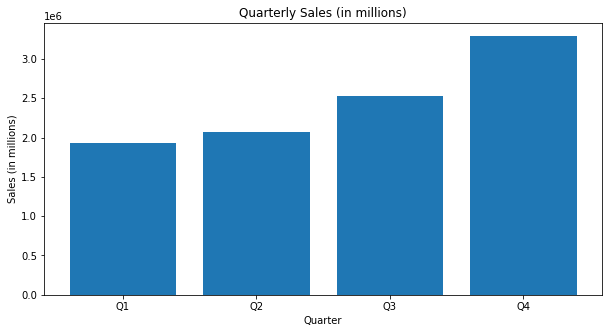

In [22]:
plt.figure(figsize = (10,5))
plt.bar(data=evaluate_quarter, x = 'Quarter', height='Sale')
plt.title('Quarterly Sales (in millions)')
plt.xlabel('Quarter')
plt.ylabel('Sales (in millions)')

Q4 is the most revenue generated quater of the year

In [23]:
evaluate_monthly = df.groupby(by=['Year','Month','Month_name'])[['Month_name','Sale']].sum().reset_index()
evaluate_monthly

,Year,Month,Month_name,Sale
0,2010,12,2010-Dec,821452.730
1,2011,1,2011-Jan,689811.610
2,2011,2,2011-Feb,522545.560
3,2011,3,2011-Mar,716215.260
4,2011,4,2011-Apr,536968.491
5,2011,5,2011-May,769281.760
6,2011,6,2011-Jun,760547.010
7,2011,7,2011-Jul,718076.121
8,2011,8,2011-Aug,757841.380
9,2011,9,2011-Sep,1056435.192


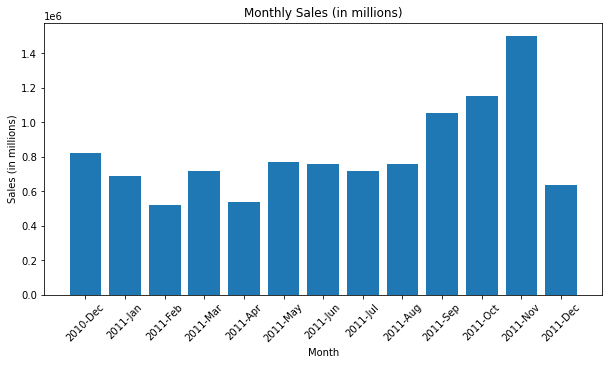

In [24]:
plt.figure(figsize = (10,5))
plt.bar(data=evaluate_monthly[:13], x = 'Month_name', height='Sale')
plt.title('Monthly Sales (in millions)')
plt.xlabel('Month')
plt.ylabel('Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

The sale drastically drop(i.e. 57.5%) from november 2011 to december 2011

Country wise sales figure

In [25]:
evaluate_country = df.groupby('Country')[['Country','Sale']].sum().sort_values(by='Sale',ascending=False).reset_index()
evaluate_country

,Country,Sale
0,United Kingdom,9001192.244
1,Netherlands,285446.340
2,EIRE,283140.520
3,Germany,228678.400
4,France,209625.370
5,Australia,138453.810
6,Spain,61558.560
7,Switzerland,57067.600
8,Belgium,41196.340
9,Sweden,38367.830


United Kingdom is the highest revenue generating country

Sale wise product ranking

In [26]:
evaluate_stock_sale = df.groupby(by=['Description'])[['Description','Quantity','Sale']].sum().sort_values(by='Sale', ascending=False).reset_index()
evaluate_stock_sale.head(10)

,Description,Quantity,Sale
0,DOTCOM POSTAGE,1708,206248.77
1,REGENCY CAKESTAND 3 TIER,13862,174156.54
2,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60
3,WHITE HANGING HEART T-LIGHT HOLDER,41937,106415.23
4,PARTY BUNTING,18287,99445.23
5,JUMBO BAG RED RETROSPOT,48375,94159.81
6,MEDIUM CERAMIC TOP STORAGE JAR,78033,81700.92
7,POSTAGE,6500,78101.88
8,Manual,6991,77752.82
9,RABBIT NIGHT LIGHT,31673,66870.03


Quantity wise product ranking

In [27]:
evaluate_stock_quantity = df.groupby(by=['Description'])[['Description','Quantity','Sale']].sum().sort_values(by='Quantity', ascending=False).reset_index()
evaluate_stock_quantity.head(10)

,Description,Quantity,Sale
0,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60
1,MEDIUM CERAMIC TOP STORAGE JAR,78033,81700.92
2,POPCORN HOLDER,56898,51334.47
3,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54951,13814.01
4,JUMBO BAG RED RETROSPOT,48375,94159.81
5,WHITE HANGING HEART T-LIGHT HOLDER,41937,106415.23
6,PACK OF 72 RETROSPOT CAKE CASES,36396,21246.45
7,ASSORTED COLOUR BIRD ORNAMENT,36362,58927.62
8,RABBIT NIGHT LIGHT,31673,66870.03
9,MINI PAINT SET VINTAGE,26633,16937.82


Customer_ID wise sale ranking

In [28]:
evaluate_customer_sale = df.groupby(by=['CustomerID','Country'])[['Sale']].sum().sort_values(by='Sale', ascending=False).reset_index()
evaluate_customer_sale 

,CustomerID,Country,Sale
0,0.0,United Kingdom,1716719.45
1,14646.0,Netherlands,280206.02
2,18102.0,United Kingdom,259657.30
3,17450.0,United Kingdom,194390.79
4,16446.0,United Kingdom,168472.50
...,...,...,...
4351,17956.0,United Kingdom,12.75
4352,16454.0,United Kingdom,6.90
4353,14792.0,United Kingdom,6.20
4354,16738.0,United Kingdom,3.75


Calculate the percentage of revenue generated by top 10 customer to the total revenue

In [29]:
evaluate_customer_sale[1:11]['Sale'].sum()/evaluate_customer_sale['Sale'].sum() * 100

14.449567179459333

In [30]:
repeating_customer = df.groupby('CustomerID').agg({'InvoiceNo':'count','Sale':'sum'}).sort_values(by='InvoiceNo', ascending=False).reset_index()
repeating_customer

,CustomerID,InvoiceNo,Sale
0,0.0,133320,1754901.91
1,17841.0,7676,40519.84
2,14911.0,5672,143711.17
3,14096.0,5111,65164.79
4,12748.0,4413,33053.19
...,...,...,...
4335,13185.0,1,71.40
4336,17331.0,1,175.20
4337,16881.0,1,432.00
4338,16323.0,1,207.50


There are 98% customers who order more than 1

In [31]:
repeating_customer[repeating_customer['InvoiceNo']>1]['CustomerID'].count() / repeating_customer['InvoiceNo'].count() * 100

98.3410138248848

In [32]:
repeating_customer[repeating_customer['InvoiceNo']>1]['Sale'].sum()

10543601.694000002

In [33]:
repeating_customer[repeating_customer['InvoiceNo']>1]['Sale'].sum() / repeating_customer['Sale'].sum() * 100

99.07948393253812

# Conclusion
**1. Which region is generating the highest revenue, and which region is generating the lowest?**
- Highest:- United Kingdom
- Lowerst:- Saudi Arabia

**2. What is the monthly trend of revenue, which months have faced the biggest increase/decrease?**
- Decrease: December 2011 (57.5%)

**3. Which months generated the most revenue? Is there a seasonality in sales?**
- November before Festive season

**4. Who are the top customers and how much do they contribute to the total revenue? Is the business dependent on these customers or is the customer base diversified?**
- Top customers are from Netherland and united kingdom. 
- The top 10 cutomers contributes 14.47% of the total revenue. Hence, we can say that customer base diversified.

**5. What is the percentage of customers who are repeating their orders?**
- 98% customers repeating their orders

**6. What are the most popular products in terms of quantity sold out?** 
- PAPER CRAFT , LITTLE BIRDIE (80995 qunatity to be sold)

**7. What is the most popular product based on sales (amount)?**
- DOTCOM POSTAGE(206248.77 dollar)

**8. Which customers spend the most?**
- Customer from Netherlands with customerID 14646.0 spent $280206.02

**9. What revenue is being generated from the customers who have ordered more than once?**
- 99% revenue i.e 10543601.69 dollar is being generated from the customers who have ordered more than once